In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
with open("multiBlock32.csv", "r") as file:
    multiBlock32 = pd.read_csv("multiBlock32.csv", header = None)
    multiBlock32.pop(258)
    multiBlock32.pop(257)
    multiBlock32.pop(0)
    multiBlock32 = np.array(multiBlock32)
print(multiBlock32)
print(multiBlock32.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(64, 256)


In [4]:
errors = np.zeros((32, 256))
print(errors)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
errors[0] = multiBlock32[1] - multiBlock32[0]
print(errors)
print(np.where(errors[0] != 0))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(array([ 61, 137, 153, 154, 169, 187, 188, 193, 194, 195, 209]),)


In [6]:
ind = 0
for i in range(0, multiBlock32.shape[0], 2):
    errors[ind] = multiBlock32[i+1]-multiBlock32[i]
    ind += 1
print(errors)
print(errors.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(32, 256)


In [7]:
for i in range(errors.shape[0]):
    print(np.where(errors[i] >= 1))

(array([193, 209]),)
(array([ 93, 130, 164, 169, 170, 172, 185, 193, 214, 230]),)
(array([184, 207, 214, 218, 238, 242]),)
(array([195]),)
(array([145, 150]),)
(array([], dtype=int64),)
(array([148]),)
(array([123, 175]),)
(array([], dtype=int64),)
(array([122]),)
(array([177]),)
(array([106, 145, 152, 154, 173, 187, 230, 235]),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([187]),)
(array([], dtype=int64),)
(array([154]),)
(array([194]),)
(array([164, 171]),)
(array([ 42, 162, 186, 229]),)
(array([ 90, 147, 171, 180, 194, 234]),)
(array([188, 195, 207, 218, 234]),)
(array([ 98, 172, 176, 238, 241]),)
(array([173]),)
(array([], dtype=int64),)
(array([130, 198, 213]),)
(array([], dtype=int64),)
(array([153]),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([ 69,  78,  80,  91, 112, 128, 148, 157]),)
(array([56]),)


In [8]:
errorsDict = {}
for i in range(errors.shape[0]):
    errorsDict.update({i : (np.array(np.where(errors[i, :] >= 1))).flatten()})
print(errorsDict)

{0: array([193, 209]), 1: array([ 93, 130, 164, 169, 170, 172, 185, 193, 214, 230]), 2: array([184, 207, 214, 218, 238, 242]), 3: array([195]), 4: array([145, 150]), 5: array([], dtype=int64), 6: array([148]), 7: array([123, 175]), 8: array([], dtype=int64), 9: array([122]), 10: array([177]), 11: array([106, 145, 152, 154, 173, 187, 230, 235]), 12: array([], dtype=int64), 13: array([], dtype=int64), 14: array([187]), 15: array([], dtype=int64), 16: array([154]), 17: array([194]), 18: array([164, 171]), 19: array([ 42, 162, 186, 229]), 20: array([ 90, 147, 171, 180, 194, 234]), 21: array([188, 195, 207, 218, 234]), 22: array([ 98, 172, 176, 238, 241]), 23: array([173]), 24: array([], dtype=int64), 25: array([130, 198, 213]), 26: array([], dtype=int64), 27: array([153]), 28: array([], dtype=int64), 29: array([], dtype=int64), 30: array([ 69,  78,  80,  91, 112, 128, 148, 157]), 31: array([56])}


In [9]:
errorNums = np.zeros(len(errorsDict.keys()))
for i in range(len(errorsDict.keys())):
    errorNums[i] = errorsDict[i].shape[0]
print(errorNums)

[ 2. 10.  6.  1.  2.  0.  1.  2.  0.  1.  1.  8.  0.  0.  1.  0.  1.  1.
  2.  4.  6.  5.  5.  1.  0.  3.  0.  1.  0.  0.  8.  1.]


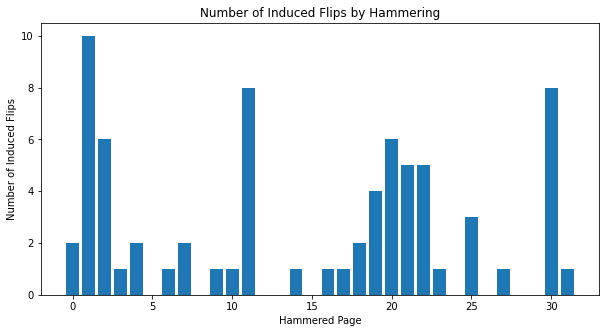

In [10]:
fig = plt.figure(figsize = (10, 5))
plt.bar(errorsDict.keys(), errorNums)
plt.title("Number of Induced Flips by Hammering")
plt.xlabel("Hammered Page")
plt.ylabel("Number of Induced Flips")
plt.show()

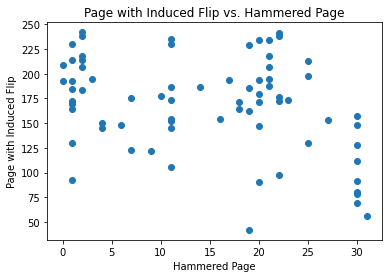

In [11]:
pointsList = []
for i in range(len(errorsDict.keys())):
    for j in range(errorsDict[i].shape[0]):
        pointsList.append((i, errorsDict[i][j]))
#print(pointsList)
x,y = zip(*pointsList)
plt.scatter(x, y)
plt.title("Page with Induced Flip vs. Hammered Page")
plt.xlabel("Hammered Page")
plt.ylabel("Page with Induced Flip")
plt.show()

In [12]:
with open("multiBlock256.csv", "r") as file:
    multiBlock256 = pd.read_csv("multiBlock256.csv", header = None)
    multiBlock256.pop(258)
    multiBlock256.pop(257)
    multiBlock256.pop(0)
    multiBlock256 = np.array(multiBlock256)
print(multiBlock256)
print(multiBlock256.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(512, 256)


In [13]:
errors256 = np.zeros((256, 256))
ind = 0
for i in range(0, multiBlock256.shape[0], 2):
    errors256[ind] = multiBlock256[i+1]-multiBlock256[i]
    ind += 1
print(errors256)
print(errors256.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(256, 256)


In [14]:
errors256Dict = {}
for i in range(errors256.shape[0]):
    errors256Dict.update({i : (np.array(np.where(errors256[i, :] >= 1))).flatten()})
print(errors256Dict)

{0: array([137, 164]), 1: array([140, 149]), 2: array([158]), 3: array([252]), 4: array([108]), 5: array([ 86, 103, 170]), 6: array([142, 170, 172, 173, 206, 246]), 7: array([194]), 8: array([], dtype=int64), 9: array([ 86,  97, 122, 185, 238]), 10: array([ 21,  73,  96, 127, 131, 184, 206, 237]), 11: array([ 79,  92, 106, 155, 181, 236, 244]), 12: array([111, 125, 173, 174, 202, 244]), 13: array([116, 156]), 14: array([97]), 15: array([], dtype=int64), 16: array([101]), 17: array([131]), 18: array([ 67, 139]), 19: array([236]), 20: array([106, 170, 184, 196, 215]), 21: array([169, 238]), 22: array([144, 164, 170, 187, 199]), 23: array([], dtype=int64), 24: array([113, 147, 148, 170, 181, 185]), 25: array([110, 125, 186, 210]), 26: array([117]), 27: array([115]), 28: array([186, 235]), 29: array([235]), 30: array([ 82,  90, 117, 120, 132, 178]), 31: array([86]), 32: array([], dtype=int64), 33: array([], dtype=int64), 34: array([76]), 35: array([], dtype=int64), 36: array([], dtype=int6

In [15]:
error256Nums = np.zeros(len(errors256Dict.keys()))
for i in range(len(errors256Dict.keys())):
    error256Nums[i] = errors256Dict[i].shape[0]
print(error256Nums)

[2. 2. 1. 1. 1. 3. 6. 1. 0. 5. 8. 7. 6. 2. 1. 0. 1. 1. 2. 1. 5. 2. 5. 0.
 6. 4. 1. 1. 2. 1. 6. 1. 0. 0. 1. 0. 0. 0. 1. 0. 2. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 2. 0. 1. 1. 0. 0. 0. 2. 1. 1. 0. 0. 0. 1. 0. 3. 2. 0. 2. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0.
 2. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 2. 5. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 2. 0. 0. 2. 0. 1.
 0. 0. 0. 0. 2. 0. 2. 2. 1. 0. 0. 0. 0. 0. 2. 0. 1. 1. 2. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 2. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 2. 0. 1. 0. 0. 0. 2. 1. 1. 1. 0. 1. 3. 0. 2. 0. 1. 1. 2. 0.
 0. 0. 0. 0. 2. 0. 1. 1. 1. 2. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 2. 0. 2. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.]


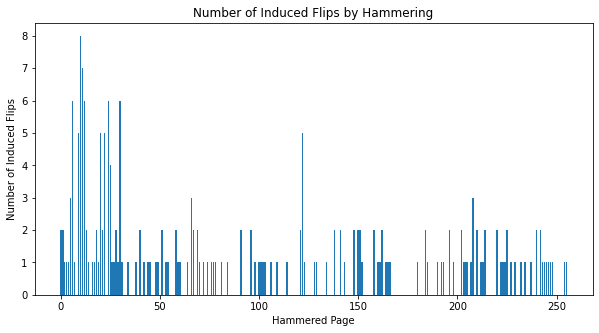

In [16]:
fig = plt.figure(figsize = (10, 5))
plt.bar(errors256Dict.keys(), error256Nums)
plt.title("Number of Induced Flips by Hammering")
plt.xlabel("Hammered Page")
plt.ylabel("Number of Induced Flips")
plt.show()

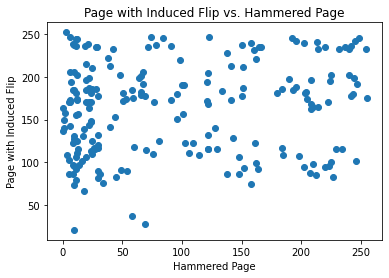

In [17]:
pointsList256 = []
for i in range(len(errors256Dict.keys())):
    for j in range(errors256Dict[i].shape[0]):
        pointsList256.append((i, errors256Dict[i][j]))
#print(pointsList)
x,y = zip(*pointsList256)
plt.scatter(x, y)
plt.title("Page with Induced Flip vs. Hammered Page")
plt.xlabel("Hammered Page")
plt.ylabel("Page with Induced Flip")
plt.show()

In [19]:
with open("multiBlock256Control.csv", "r") as file:
    multiBlock256C = pd.read_csv("multiBlock256Control.csv", header = None)
    multiBlock256C.pop(258)
    multiBlock256C.pop(257)
    multiBlock256C.pop(0)
    multiBlock256C = np.array(multiBlock256C)

In [21]:
errors256C = np.zeros((256, 256))
ind = 0
for i in range(0, multiBlock256C.shape[0], 2):
    errors256C[ind] = multiBlock256C[i+1]-multiBlock256C[i]
    ind += 1

In [22]:
errors256CDict = {}
for i in range(errors256C.shape[0]):
    errors256CDict.update({i : (np.array(np.where(errors256C[i, :] >= 1))).flatten()})

In [23]:
error256CNums = np.zeros(len(errors256CDict.keys()))
for i in range(len(errors256CDict.keys())):
    error256CNums[i] = errors256CDict[i].shape[0]

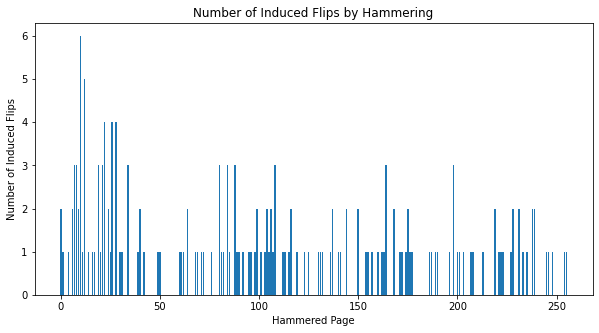

In [25]:
fig = plt.figure(figsize = (10, 5))
plt.bar(errors256CDict.keys(), error256CNums)
plt.title("Number of Induced Flips by Hammering")
plt.xlabel("Hammered Page")
plt.ylabel("Number of Induced Flips")
plt.show()

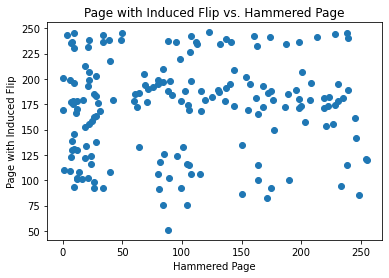

In [26]:
pointsList256C = []
for i in range(len(errors256CDict.keys())):
    for j in range(errors256CDict[i].shape[0]):
        pointsList256C.append((i, errors256CDict[i][j]))
#print(pointsList)
x,y = zip(*pointsList256C)
plt.scatter(x, y)
plt.title("Page with Induced Flip vs. Hammered Page")
plt.xlabel("Hammered Page")
plt.ylabel("Page with Induced Flip")
plt.show()